In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

In [2]:
train_df = pd.read_json("train.json.zip")
test_df = pd.read_json("test.json.zip")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [3]:
#No missing values
# print("Missing values for Training data")
# print(train_df.isnull().sum())

# print('\n')

# print("Mission values for Test data")
# print(test_df.isnull().sum())

In [4]:
# print("Information of training data:")
# print(train_df.info())

# print('\n')

# print("Information of test data:")
# print(test_df.info())

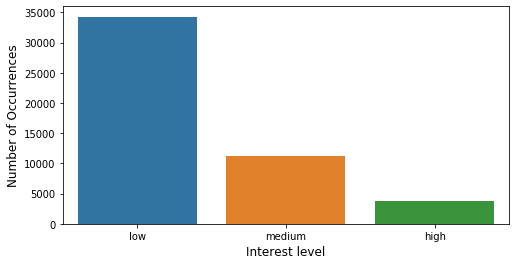

In [5]:
# Interest Levels
interest_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(interest_level.index, interest_level.values, order=['low', 'medium', 'high'])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

In [8]:
def plot_values(col_name, xlabel, ylabel, color_no):
    num_col = train_df[col_name].value_counts()
    plt.figure(figsize=(8,4))
    sns.countplot(num_col.index, num_col.values, color=color[color_no], hue=train_df['interest_level'])
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel(xlabel, fontsize=12)

In [9]:
plot_values('bathrooms', 'No of occurrences', 'No of bathrooms', 1)
# print(train_df['bathrooms'].value_counts())

TypeError: Cannot pass values for both `x` and `y`

<Figure size 576x288 with 0 Axes>

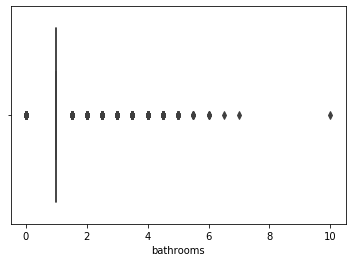

In [58]:
sns.boxplot(x=train_df['bathrooms'])

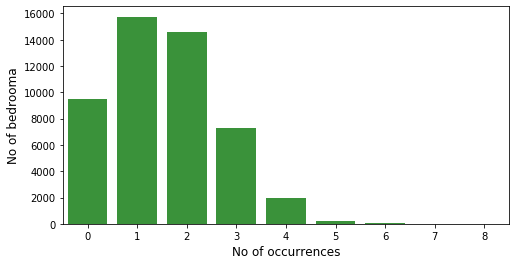

In [50]:
plot_values('bedrooms', 'No of occurrences', 'No of bedrooma', 2)
# print(train_df['bedrooms'].value_counts())

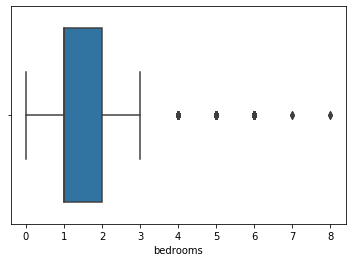

In [59]:
sns.boxplot(train_df['bedrooms'])

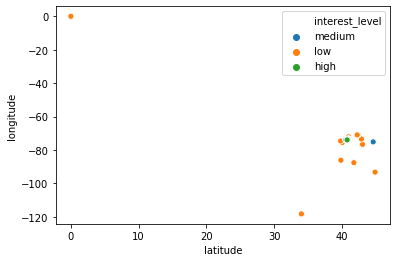

In [63]:
# Exploring lat / lon
sns.scatterplot(train_df['latitude'], train_df['longitude'], hue=train_df['interest_level'])

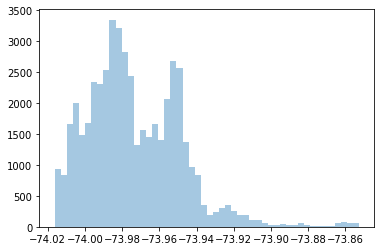

In [139]:
# Longitude Data 

lower_limit = np.percentile(train_df.longitude.values, 1) # Lower Limit = -74.0162, 534 values eliminated
upper_limit = np.percentile(train_df.longitude.values, 99) # Upper Limit = -73.8526, 494 values eliminated

long_data = train_df[(train_df['longitude'] <= upper_limit) & (train_df['longitude'] >= lower_limit)] 

# Histogram to show longitude
sns.distplot(long_data.longitude.values, bins=50, kde=False)

Text(0.5, 0, 'longitude')

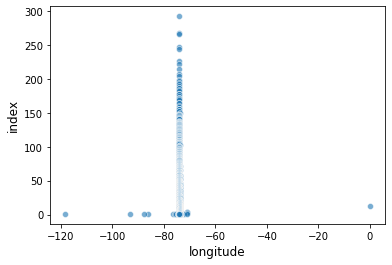

In [22]:
# Scatterplot to show outliers in longitude
num_col = train_df['longitude'].value_counts()
sns.scatterplot(num_col.index, num_col.values, alpha=0.6)
plt.ylabel('index', fontsize=12)
plt.xlabel('longitude', fontsize=12)

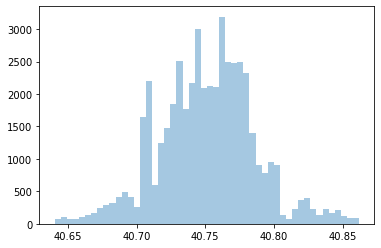

In [150]:
# Latitude Data 

lower_limit = np.percentile(train_df.latitude.values, 1) # Lower Limit = 40.6404, 491 values eliminated
upper_limit = np.percentile(train_df.latitude.values, 99) # Upper Limit = 40.8620, 494 values eliminated

long_data = train_df[(train_df['latitude'] <= upper_limit) & (train_df['latitude'] >= lower_limit)] 

# Histogram to show latitude
sns.distplot(long_data.latitude.values, bins=50, kde=False)

Text(0.5, 0, 'latitude')

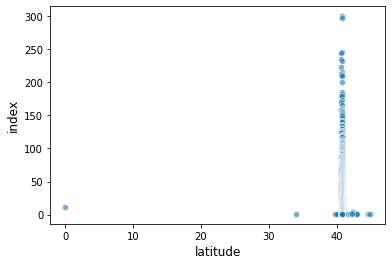

In [152]:
# Scatterplot to show outliers in latitude
num_col = train_df['latitude'].value_counts()
sns.scatterplot(num_col.index, num_col.values, alpha=0.6)
plt.ylabel('index', fontsize=12)
plt.xlabel('latitude', fontsize=12)

Text(0, 0.5, 'price')

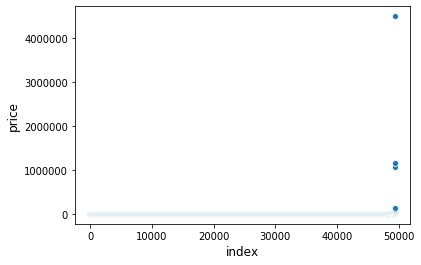

In [82]:
# Price 
x = range(train_df.shape[0]) # One point for each row
y = np.sort(train_df['price']) # Price sorted in assending order
# sns.scatterplot(range(train_df.shape[0]),np.sort(train_df['price']))
sns.scatterplot(x, y)
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)

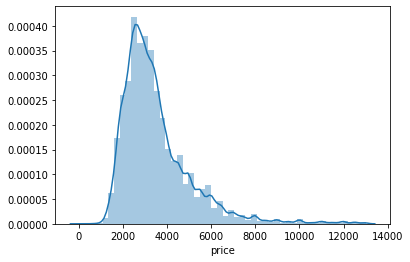

In [106]:
# Histogram for price
# Upper limit of the price range (13000)
# 481 listings have rent more than 13000 which are the outliers as seen in the previous plot
upper_lim = np.percentile(train_df.price.values, 99) 
price_data = train_df[train_df['price'] <= upper_lim]
sns.distplot(price_data['price'])

In [11]:
df = train_df

In [12]:
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


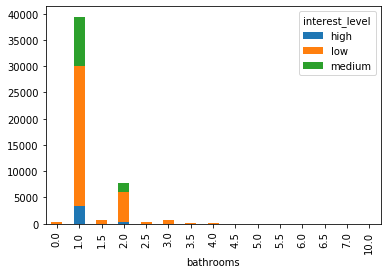

In [19]:
df_plot = df.groupby(['bathrooms', 'interest_level']).size().reset_index().pivot(columns='interest_level', index='bathrooms', values=0)
df_plot.plot(kind='bar', stacked=True)

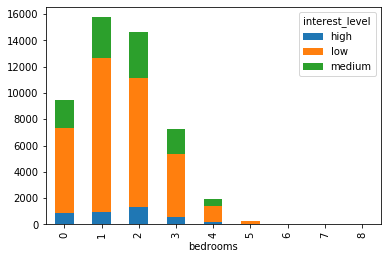

In [20]:
df_plot = df.groupby(['bedrooms', 'interest_level']).size().reset_index().pivot(columns='interest_level', index='bedrooms', values=0)
df_plot.plot(kind='bar', stacked=True)